# DSCI 521: Methods for analysis and interpretation <br> Chapter 6: Counting & probability for quantitative frameworks

## 6.1 Probability
So, we finally get to approach the topic of probability head on. However, we've been using bits and pieces of it for a while. Additionally, we've been using elements of statistics, too. So to get things started let's get a good idea of the difference.

### 6.1.0 What's the Difference Between Probability and Statistics?
These two disciplines are near inseparable. However, they're not the same thing. Additionally, they're not branches of mathematics, outright. They are actually domains of applied mathematical concepts. If you ask around to try and figure out which one is more &quot;mathy&quot;, most folks would probably say probability. So let's get down to it. Here's my quick shot:

- statistics is about observing patterns that the world created
- probability is about defining patterns that the world might make

You might use a probability model to explain a pattern you observe, or observe a statistical pattern in data that excludes the applicability of a probability model. They really come at the investigation of data from two ends of the spectrum. This time, I kind of think The Data Science Handbook comes in best describing the difference between the two disciplines

> Probability is often confused with statistics. The way I would break it down is to say that probability is a collection of techniques for describing the world using mathematical models that include randomness. In particular, probability focuses on what you can derive about the world assuming that it is well described by one of these models. For example, if we assume a certain distribution of human heights, then how many people in a crowd can we expect to be over 5 ft tall? Statistics is more about working backward: given some real-world data, what can we infer about the real-world process (which we imagine to be some probability model) that generated it?

So, now that that's out of the way, let's learn a little about what these probability models are and how they're built.

### 6.1.1 Counting
Lot's of the probability models out there rely fundementally on counting. So, to start we'll move along with a basic review of the different ways things get counted up. Generally, there'll be some notion of how many things (balls, colors, etc.) exist, $n$, and from them, the number that we would like to select, $k$.

- http://www.zipcon.net/~swhite/docs/math/probability/counting.html

#### 6.1.1.1 Selection with replacement
This covers circumstances in which $k$ elements are selected from a set of $n$, but the elements are put back in the set after each selection. For example, we might have $n$ balls in a bag and to draw and replace 1 ball $k$ times. Upon running this experiment, we would encounter one of $n^k$ outcomes. Since selection with replacement is really just exponentiation, all we have to do is use the Python built-in binary operation to find the number of possible outcomes for $3$-ball selections from a bag of $10$

In [8]:
## the number of 3-ball selections from a bag of 10, with replacement
print(10**3)

1000


#### 6.1.1.2 Permutations of $n!$
A _permutation_ of $n$ distinct items is just an ordering. These might also be referred to as distinct sequences. For example, if we're just worried about the three letters $\{a, b, c\}$, the $6$ possible orderings are:

- $a, b, c$
- $a, c, b$
- $b, a, c$
- $b, c, a$
- $c, a, b$
- $c, b, a$

As it turns out, the number of orderings of $n$ distinct items is:

$$P(n) = n \times (n - 1) \times (n - 2) \times \cdots \times 3 \times 2 \times 1 = n!$$

which is referred to as the _factorial_ of $n$, or simply &quot;n factorial&quot;. Note: factorials get _big_ fast. Finding a factorial is a problem of repeated multiplication, which is tricky for a computer, so there's a nice pre-built function in the math module:

In [9]:
import math

## find the factorial of an integer
print(math.factorial(10))

3628800


#### 6.1.1.3 Permutations of $k$ from $n$
How many different $k$-sized permutations exist from a set of $n$ items? That's what we're doing here, and it's not as simple as taking $k!$ Instead, it amounts the quotient:

$$
P(n, k) = \frac{n!}{(n-k)!} = 
\frac
{n \times (n - 1) \times \cdots \times (n-k) \times (n - k - 1)\times \cdots \times 2 \times 1}
{(n-k) \times (n - k - 1) \times \cdots \times 2 \times 1}
=  n \times (n - 1) \times \cdots \times (n - k + 1)
$$

Note: this is definitely bigger than $k!$, since each unique $k$-subset has $k!$ permutations of its own. To compute the permutations of $k$ items from $n$ all we have to do now is use the factorial function we just saw in __Sec. 1.1.2__:

In [10]:
## find the number of permutations of 3 items taken from 10
print(math.factorial(10)/math.factorial(10 - 3))

720.0


#### 6.1.1.4 Combinations of $k$ from $n$
Finally, there are _combinations_ of $k$ items from $n$, which are the ways in which $k$ of the $n$ items can be combined, _regardless of order_. This one has a very special name: &quot;$n$ choose $k$&quot;. It's really all about the _choice_ of the $k$, since their order doesn't matter. The formula is now a bit more complicated, still:

$$C(n,k) = \frac{n!}{k!(n-k)!}$$

but still quite easy to put together with the math module's factorials. Note: there are fewer combinations of $k$ from $n$ than permutations.

In [11]:
## find the number of permutations of 3 items taken from 10
print(math.factorial(10)/(math.factorial(3)*math.factorial(10 - 3)))

120.0


### 6.1.2 Probability Axioms, Rules, and definitions
Now that we've got our counting rules out of the way, let's talk about what probabilities are, in theory. For an intuition, let's think of probability as described in Data Science From Scratch:

> a way of quantifying the uncertainty associated with events

#### 6.1.2.0 Mutual Exclusivity
Can two events co-occur? A core notion in probability is _mutual exclusivity_, in which two evvents cannot both occur. For example, suppose we're drawing a single card from a standard deck of 52. Drawing a red card and drawing a black card are mutually exclusive events&mdash;a card cannot be both red and black. On the other hand, drawing a black card and drawing a diamond are _not_ mutually exclusive events&mdash;there are a number of cards that are both black and of the diamond suite.

#### 6.1.2.1 Axioms

_Probabilities_ are the quantifications of uncertainty that we are interested in. We'll use the notation for the probability, $P$, that the event, $X$, occurs as $P(X)$. It is customary to read $P(X)$ as: &quot;the probability of $X$ occurring&quot;.

Importantly, probabilities are subject to few pre-identified properties, or, _axioms_:

1. Probabilities are always non-negative: $P(X) \geq 0$.
2. A probability of 1 indicates complete certainty.
3. The probability that one of two mutually exclusive events, $X$ or $Y$, occurs is additive:
$$P(X\text{ or }Y) = P(X)+P(Y)$$

#### 6.1.2.2 The Sum Rule: a General Connection Between &quot;and&quot; & &quot;or&quot;

From these axioms, we get a very helpful probability rule known as the _sum rule_:

$$P(X\text{ or }Y)=P(X)+P(Y)-P(X\text{ and }Y)$$

Note that this, together with our definition of mutual exclusivity and the third probability axiom tells us that if two events, $X$ and $Y$, are mutually exclusive, then:

$$P(X\text{ and }Y) = 0$$

#### 6.1.2.3 Dependence and Independence
Another important notion in probability theory is the _independence_ of events. Two events are considered independent if the occurrence of one does not depend on another. _Independence is different from the notion of mutual exclusivity_. For example, if we're rolling of two dice, the outcome of one of the dice is independent from the other. In the case that two events, $X$ and $Y$, are independent, we have the independence rule:

$$P(X\text{ and }Y) = P(X)P(Y).$$

Note: this can be combined with the sum rule, too! If $X$ and $Y$ are independent events, then:

$$P(X\text{ or }Y)=P(X)+P(Y)-P(X)P(Y)$$

#### 6.1.2.4 Conditional Probability
The next tool for navigating probability is called _conditioning_, in which information about events is assumed. For example, we might assume that the card we will draw is black, and then assess the _conditional_ probability that it is also a diamond. This would be notated and stated as follows: if $X$ and $Y$ are two events, and $Y$ is assumed to be true, then the conditional probability, $P(X|Y)$, is referred to as the &quot;probability of $X$ given $Y$&quot;.

So, with conditioning idependence plays an important role. Supposing $X$ and $Y$ are independent events, we know

$$P(X|Y) = P(X)\:\:\:\text{ and }\:\:\:P(Y|X) = P(Y).$$

Intuitively, if $X$ and $Y$ are independent events, then assumed information about one provides no information about the other.

#### 6.1.2.5 Bayes' Rule/Law/Theorem
Another rule for navigating the world of conditional probability that pops up _a lot_ in data science carries the name of [Reverend Thomas Bayes](https://en.wikipedia.org/wiki/Thomas_Bayes). It's referred to as a rule, law, and theorem, but most importantly for us right now, it provides us a way to do a few things:

1. switch the ordering of conditional probabilities, and
2. switch between conditional probabilities and the assessment of multiple outcomes.

Bayes' rule for two events, $X$ and $Y$ can be stated in either order:

$$P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)} \iff P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}.$$

The other way to think of Bayes' rule is as a general connection between multiple outcomes assessment and conditional probability

$$P(X\text{ and }Y) = P(X|Y)P(Y) = P(Y|X)P(X),$$

which holds _regardless_ of independence. This allows us to write the sum rule generally as:

$$P(X\text{ or }Y) = P(X) + P(Y) - P(X|Y)P(Y) = P(X) + P(Y) - P(Y|X)P(X) $$

## 6.2. Probabilities from Empirical Data
Now that we've gotten the basic theory for how the probabilities of events relate to one another, let's look at how we can estimate probabilities from data.

### 6.2.1 Discrete Empirical Probabilities
Remember our old friends histograms? They can provide us with nice empirical representations of probability distributions. However, we're _not_ going to talk about histograms, yet! Right now we're talking about normalization of discrete events (examples below). Because histograms analyze numeric data continuously, they're measuing empirical probability distrbibutions with need for _binning_. That is, two observed values might be very close together, but not categorically _the same_ as we have with discrete data. For discrete data, things are much simpler and more straightforward.

#### 6.2.1.0 Normalization
Our first two probability axioms:

1. Probabilities are always non-negative: $P(X) \geq 0$.
2. A probability of 1 indicates complete certainty.

are key stipulations for a strategy to form empirical probabiltiy representations.

Together, they mean that our whole universe of probability must somehow add up to one, and that no individual probability can ever be greater than 1. Thus, we'll refer to the process of numeric data _normalization_ as its conversion to a collection of non-negative numbers that add up to one&mdash;an empirical probability distribution. Generally speaking, if we have a collection of non-negative numbers: 

$$\{x_1, \cdots, x_n\},\:\: x_i\geq 0\text{ for all }i;$$

that have a positive sum:

$$\sum_{i = 1}^nx_i > 0,$$

then the quantities:

$$p_j = \frac{x_j}{\sum_{i = 1}^nx_i}\text{ for all }i,$$

collectively: $\{p_1, p_2, \cdots, p_n\}$ form an _empirical probability distribution_.

#### 6.2.1.1 Frequencies of Observed Events Are Always Normalizable
This is an _extremely_ important strategy for the formation of empirical probability distributions. _Frequency_ means multiplicity of observation, so whether we're rolling dice and couting the number of times we've observed each roll, asking how many men vs. women are in the room, or counting the appearances of words in a book, we have a general strategy for forming probabilities.

#### 6.2.1.2 Word-Frequency Distributions 
Word-frequency distributions are a very common input to machine learning and statistical classifiers, and one of the ways they are used is precisely as described in __Sec. 3.2.1__. So, let's take one of our favorite books&mdash;Moby Dick&mdash;and create an empirical probability distribution.

In [12]:
from __future__ import division
from collections import Counter
import re

## initialize a counter for our words
frequency = Counter()

## open the book as f
with open("data/books/2701.txt") as f:
    ## iterate over lines (by newline breaks)
    for line in f:
        ## removing leading and trailing whitespace
        line = line.strip()
        ## split the line by space to get the "words"
        for word in re.split(" ", line):
            ## count the words up
            frequency[word] += 1

## find the sum of all frequencies
total_frequency = sum(frequency.values())

## comprehend our dictionary of word probabilities
probabilities = {word: frequency[word]/total_frequency for word in frequency}

#### 6.2.1.3 How do we interpret these probabilities?
Without thinking specifically about modeling and algorithms, we could a number of probability-related questions, like are these probabilities independent? In truth, almost certainly not! However, this approach to an empirical probability distribution is _very_ naïve, and results from what os referred to as the _bag of words_ model. Earlier, we discussed the probability of observing a card of color or suit, which implicity assumes the cards are _shuffled_. Well, this&mdash;bag of words&mdash;does the same thing! Think of it as the model that takes every single word in the book, jumbles them, and then asks: &quot;what's the probability that the first word is `"Moby"` or `"Dick"`, i.e., what's the value $P(\text{Moby})$ vs. $P(\text{Dick})$. If we look at these probabilities individually (below), would you think they're the same? If they're not, why? Despite this exceptionally naïve perspective taken with the bag of words model it has become quite pervasive in machine learning, both because it is 1) simple, and 2) powerful.

In [13]:
print(probabilities["Moby"], probabilities["Dick"])

0.00035359527298950845 0.00014888222020610883


#### 6.2.1.4 Example: Node-Degree Distributions
Recall our discussions of linear algebra and networks in __Chapters 1 and 4__. In those discussions we came to the questions:

- Input: How many other nodes point to our node?
- Output: How many other nodes does our node point to?

Both of these questions refer to a numeric quantity referred to as a node's _degree_. Specifically, they are referred to as a given node's _in degree_ and _out degree_, respectively. From them, we are able to measure the empirical _degree distributions_ of a network, which are computed from frequencues. Specifically, to find the _in-degree distribution_ of a network, we must be able to answer the questions:

- How many nodes have in-degree equal to $k$?

and _normalize_ the answer by the number of _nodes_ in the network. So, if a network has $N$ total nodes and the number of nodes having in-degree $k$ is $n_\text{in}(k)$, then the empirical in-degree distribution is computed as:

$$P_\text{in}(k) = \frac{n_k}{N}$$

and answers the question:

- What's the chance of plucking an in-degree $k$ node from the network's _bag of nodes_?

Or, in the intuitive context of social networks:

- What's the probability of meeting someone who's name is known by $k$ others?

Let's compute both the in-degree and out-degree distributions from last week's empirical Twitter network:

In [14]:
from collections import defaultdict

## make a defaultdict for the node degrees (in and out)
degrees = defaultdict(lambda : [0,0])

## open the  network file
with open("./data/twitter_combined.txt", "r") as f:
    ## loop over the lines
    for line in f:
        ## remove any leading/trailing whitespace
        line = line.strip()
        source, target = re.split(" ", line)
        ## increment the source node's out degree
        degrees[source][0] += 1
        ## increment the target node's in degree
        degrees[target][1] += 1
        
## initialize a degree-frequency defaultdict object
degree_fequencies = defaultdict(lambda : [0,0])

## find the in- and out-degree frequencies
for node in degrees:
    ## unpack this node's out- and in-degrees
    k_out, k_in = degrees[node]
    ## increment the number of k_out-degree nodes
    degree_fequencies[k_out][0] += 1
    ## increment the number of k_in-degree nodes
    degree_fequencies[k_in][1] += 1
    
## find the number of nodes in the network
N = len(degrees)    
    
## comprehend the in- and out-degree distributions
out_DD = {
    k: degree_fequencies[k][0]/N 
    for k in degree_fequencies 
    if degree_fequencies[k][0]
}

in_DD = {
    k: degree_fequencies[k][1]/N 
    for k in degree_fequencies 
    if degree_fequencies[k][1]
}

#### 6.2.1.5 Interpretation: What's the probabily that $k$ people know my name?
That's essentially the question being answered by the in-degree distribution.
Let's see the probability of meeting someone who's name is known by precisely 1 vs. 32 people.

In [15]:
print(in_DD[1], in_DD[32])

0.12564878360760584 0.005337859444567436


#### 6.2.1.6 Aside: visualization of network degree probabilities
Even though _network_ visualization suffers, we _can_ visualize degree distributions.
And the way to do this is with scatter plot that has both x- and y-axes log transofrmed! However, since we now have direct control over both of the x- and y-variables we'll use numpy to perform out log-spacing for us before plotting and label our axes accordingly.

Note: The reason we've log-transformed both axes again is because this transform makes the data appear liner again (for the most part).  This exhibits the possibility of a specific, theoretical probability relationship referred to as a power-law.

/Users/jw3477/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/Users/jw3477/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


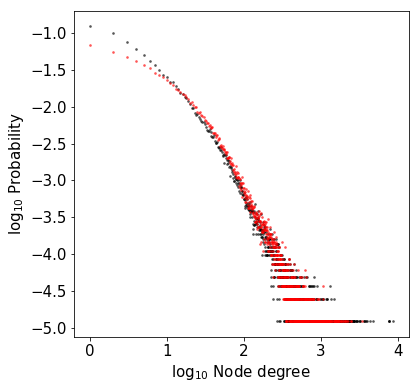

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (6,6))

_ = plt.scatter(np.log10(list(in_DD.keys())), np.log10(list(in_DD.values())), s = 3, color = "black", alpha = 0.5)

_ = plt.scatter(np.log10(list(out_DD.keys())), np.log10(list(out_DD.values())), s = 3, color = "red", alpha  = 0.5)

_ = plt.ylabel("$\log_{10}$ Probability", fontsize = 15)

_ = plt.xlabel("$\log_{10}$ Node degree", fontsize = 15)

plt.tick_params(labelsize=15)

### 6.2.2 Continuous  Empirical Probabilities
Continuous probability distributions pertain to data whose x-variables can't be counted and are arbitrarily close together. So, unlike our categorical distributions of words, or discrete distributions of node degrees, one source of data for which we might construct continuous probability distributions are the baseball player heights, weights, and ages. Even if the reported data might only be discretely reported (like age) or measured  to within a finite precision (like heights), these variables can, in theory, be arbitrarily close together. This makes normalization a bit more tricky. Instead of how our discrete-data, $[x_1, \cdots, x_n]$ probabilities had to add up to 1:

$$1 = \sum_{i=1}^n p_i$$

continuous-data probabilities require estimation of a _continuous-data_ probability distribution _function_, $P(x)$, that takes on  values between  every observed pair of data points. Over a specified domain, e.g., $x\in [a,b]$, the area between $P(x)$'s graph and the $x$-axis must _accumulate_ to 1:

$$1 = \int_a^bP(x)dx$$

While we won't be worrying too much about computing integrals in order to construct any continuous probability functions, we will need to focus a bit again on histograms, which allow us to compute entirely empirical estimates of continuous probability.

#### 6.2.2.1 Histograms
As empirical representations of probability distributions, histogram bar heights don't add up to one as we have required in __Sec. 2.1.0__. Since continuous probabilities _accumulate_ to 1, it is the the _areas_ of their bars that must add to 1! As it turns out, the `plt.hist()` function is not only good for making visualizations; it can return bar heights and widths, too. The first two items returned by this function are:

- n : array or list of arrays
    - The values of the histogram bins. See normed or density and weights for a description of the possible semantics. If input x is an array, then this is an array of length nbins. If input is a sequence arrays [data1, data2,..], then this is a list of arrays with the values of the histograms for each of the arrays in the same order.
- bins : array
    - The edges of the bins. Length nbins + 1 (nbins left edges and right edge of last bin). Always a single array even when multiple data sets are passed in.

Let's look at how we can use these output to build an empirical, continuous probability function from the baseball players' weights. Remember, we can specify that our histogram be `normed = True` to make the output a probability distribution right away. The challenge  here is using this information to be able to ask of the probability of an _arbitrary_ weight.

#### 6.2.2.2 Example: computing continuous empirical probabilities.
Returning to the baseball player weights (again), let's make the histogram and save the `n` and `bins` output:

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


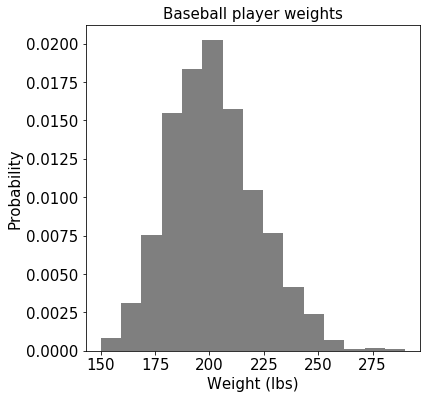

In [17]:
import pandas as pd

baseball_data = pd.read_csv(
    filepath_or_buffer="./data/baseball_heightweight.csv", 
    sep=",", header=0
).dropna()

## set the figure dimensions
hist_fig = plt.figure(figsize = (6,6))
    
## make a histogram and set the number of bins to 15
n, bins, _ = plt.hist(
    baseball_data["Weight"], bins = 15, 
    normed = True, alpha = 0.5, color = "black"
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Baseball player weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Weight (lbs)", fontsize = 15)

Now let's inspect the `n` and `bins` output to see what we've got. Note that there is one more bin endpoint than there are bin heights! Let's also check to make  sure the bin areas $(length) \times (height)$ add up to 1. We can use a trick here:

- Since all of our bins are equally spaced, we can just multiply the sum  of $n$'s values by a single bin's width.

In [18]:
print(len(n), n)
print("")
print(len(bins),bins)
print("")
## multiply the sum of bin heights by the first bin's width
print(sum(n)*(bins[1] - bins[0]))

15 [0.00082976 0.0031116  0.00757157 0.01545429 0.01835846 0.02022542
 0.01576545 0.01047573 0.00767529 0.0041488  0.00238556 0.00072604
 0.00010372 0.00020744 0.00010372]

16 [150.         159.33333333 168.66666667 178.         187.33333333
 196.66666667 206.         215.33333333 224.66666667 234.
 243.33333333 252.66666667 262.         271.33333333 280.66666667
 290.        ]

1.0000000000000009


Now let's see what the different probabilities are. Hey, these bin heights are a numpy array! We can just compute the probabilities using the _pointwise product_ of a single bin's width (a scalar) times `n` (a vector). Cool!

In [19]:
print(n*(bins[1] - bins[0]))

[0.00774443 0.02904163 0.07066796 0.14424008 0.1713456  0.18877057
 0.14714424 0.09777348 0.07163601 0.03872217 0.02226525 0.00677638
 0.00096805 0.00193611 0.00096805]


Now let's see where the maximum-probability range for weight is. We can do this by:

1. zipping the heights together with a range of indices
2. calling `max()` on the zipped contents
3. entering the max-index and index-plus-one into the bins to find the bounds

In [20]:
## zip together the heights  and a range of indices
IndexedBinHeights = zip(n,range(len(n)))
## call `max()` on the zipped contents
MaxHeight, MaxIx = max(IndexedBinHeights)
## print highest probabiltiy range and the the endpoints of this max bin
print(MaxHeight*(bins[1] - bins[0]), bins[MaxIx], bins[MaxIx+1])

0.18877057115198506 196.66666666666669 206.0


Now let's make a function to report the probability of a baseball player's weight. Note: since these data are binned, this will only tell us an answer to the related  question:

- What's the probability that a baseball player has weight similar to that in question?

Since the edges are increasing in order we can just loop over them until we find an upper bound. If we break out at this point our index will be the bin height of interest. Note: we'll have to start with a bin height of 0, in case the weight  is lower  than  _any_ observed. Likewise, this will mean the height is set at zero if no upper bound is found!

In [21]:
def SimilarWeightProbability(weight):
    BinHeight = 0
    for i, UpperBound in enumerate(bins):
        if weight <= UpperBound:
            if i:
                BinHeight = n[i-1]
            break
    return(BinHeight*(bins[1] - bins[0]), (bins[i], bins[i+1]))

I weight about `175` pounds. Let's see the probability a baseball player weights something similar to me.

In [22]:
print(SimilarWeightProbability(175))

(0.07066795740561471, (178.0, 187.33333333333334))


So it sounds like my weight is in a lower range&mdash;am I too skinny? Well, we can find the same distribution of heights, but the question that we really want to answer is 

- How likely is my weight, given the height range I fit into?

This is a conditional probability question! Specifically, since my height is right around `6'`, we want to figure out:

$$P(\text{a player is similar to 185 lbs}\mid \text{a player is similar to 6' tall})$$

This conditional assessment involves data that we  can frame in a 2-dimensional probability distribution, where both player height and weight are described. With this _joint_ probability  distribution we can then utilize Bayes' rule (__Sec. 6.1.2.5__):

$$
P(\text{a player is similar to 185 lbs}\mid \text{a player is similar to 6' tall})=
\frac{P(\text{a player is similar to 6' tall and 185 lbs})}{P(\text{a player is similar to 6' tall})}
$$

So, how can we perform a 2-d histogram?

Well, there is a corresponding 2-dimensional histogram function that works in a similar way to the 1-dimensional matplotlib histogram that we're used to. However, this function is not oriented specifically towards plotting! Instead it's provided by Numpy:

- `heights, xedges, yedges = numpy.histogram2d(x, y)`

Note: we're not using the hexbin function that we've learned about because it's _a lot_ harder to tell if a point is in a hexagon than a square. 

In [23]:
## make a histogram and set the number of bins to 15
BinHeights, WeightBinEdges, HeightBinEdges = np.histogram2d(
    baseball_data["Weight"], baseball_data["Height"], bins = 15, normed = True
)

## the bin heights are a 15 x 15 numpy array
print(BinHeights.shape)

print(BinHeights[0:3,0:3])
print("")

## These edges are in bin-weight units, there are 16
print(WeightBinEdges[0:4])
print("")

## These edges are in bin-height units, there are 16
print(HeightBinEdges[0:4])
print("")

## now it's a bin's rectangular area times its height that makes probability
rectangle_area = (WeightBinEdges[1] - WeightBinEdges[0])*(HeightBinEdges[1] - HeightBinEdges[0])
print(np.sum(BinHeights*rectangle_area))
print("")

(15, 15)
[[0.00019448 0.         0.00019448]
 [0.00029171 0.00038895 0.00048619]
 [0.         0.00058343 0.0007779 ]]

[150.         159.33333333 168.66666667 178.        ]

[67.         68.06666667 69.13333333 70.2       ]

0.9999999999999978



So, what is the probability of my joint height-_and_-weight class? Here, will have to do something similar for both height and weight, scanning for two upper bounds independantly to get the appropriate height-weight bin's height.

In [24]:
def SimilarHeightAndWeightProbability(height, weight):
    BinHeight = 0
    
    for i, UpperBound in enumerate(WeightBinEdges):
        if weight <= UpperBound:
            break
    else:
        i = i + 1
            
    for j, UpperBound in enumerate(HeightBinEdges):
        if height <= UpperBound:
            break
    else:
        j = j + 1
        
    if i and j and i < 15 and j < 15:
        BinHeight = BinHeights[i, j]
            
    return(BinHeight*rectangle_area)

In [25]:
print(SimilarHeightAndWeightProbability(72, 175))

0.03000968054210996


Eep, the probability is even lower. But what we're probably looking for is the the _conditional_ probability of height, given my weight. For this, we'll have to divide:

$$
P(\text{a player is similar to 185 lbs}\mid \text{a player is similar to 6' tall})=
\frac{P(\text{a player is similar to 6' tall and 185 lbs})}{P(\text{a player is similar to 6' tall})}
$$

by the column's sum of total probability that a person has height similar to me. So we'll have to basically make a new function just for finding my height-class's probability, given the new joint distribution. We'll do the same for row sums, too, to get a sense of how this binning has affected my weight-class.

In [26]:
def SimilarWeightProbabilityJoint(weight):
    BinHeight = 0
    for i, UpperBound in enumerate(WeightBinEdges):
        if weight <= UpperBound:
            if i:
                BinHeight = sum(BinHeights[i,])
            break
    return(BinHeight*rectangle_area)

In [27]:
def SimilarHeightProbabilityJoint(height):
    BinHeight = 0
    for i, UpperBound in enumerate(HeightBinEdges):
        if height <= UpperBound:
            if i:
                BinHeight = sum(BinHeights[i,])
            break
    return(BinHeight*rectangle_area)

In [28]:
print(SimilarHeightProbabilityJoint(72), SimilarWeightProbabilityJoint(175))

0.18877057115198445 0.1442400774443364


Okay, so it looks like my height is slightly favored in this 2-dimensional binning. To complete the weight-_given_-height excersise, we can now just build one last function

In [29]:
def similarWeightGivenHeightProbability(weight, height):
    return(
        SimilarHeightAndWeightProbability(height, weight)/
        SimilarHeightProbabilityJoint(height)
    )

So, am I a _more_ common weight, given that my height of 72 inches? As it turns out, I'm a bit more 'average', given my height. One or two weight classes above would be even more likely. So, ideal players are still probably a bit larger.

In [30]:
print(similarWeightGivenHeightProbability(175, 72))
print("")
print(similarWeightGivenHeightProbability(185, 72))
print("")
print(similarWeightGivenHeightProbability(195, 72))
print("")

0.1589743589743569

0.18974358974358727

0.19487179487179296



## 6.3 Random Variables
All this time we've been talking about probabilities of events. So far, we've discussed estimations of events through empirical observations of frequencies. With _random variables_ we're usually assuming some sort of functional form or process that generates data. Thus, random variables are often probabalistic models&mdash;ideals&mdash;that our data might apply to. Specifically, these variables are the $X$ values we discuss inside of our probability functions. As Data Science From Scratch puts it:

> A random variable is a variable whose possible values have an associated probability
distribution

Just like with empirical probabilities, random variable probabilities come in two main flavors: _discrete_ and _continuous_. However, unlike empirical probabilities random variables can succicntly be described and observed by sampling, using well-known functions and modules. So, this section will be a lot like a trip to the zoo to see a few creatures.

### 6.3.1 Discrete random varibles
As usual, we're going to be building up from less to more complex concepts in this discussion!

#### 6.3.1.1 Flipping a coin: Bernoulli random variables
As is stated in The Data Science Handbook:

> The simplest probabilistic model is just flipping a (possibly biased) coin. Let's say that the probability of getting a head is p, and hence, the probability of tails is 1−p.

So as a function, this one's so simple it's almost harder to understand:

$$P(\text{heads}) = p; \:\:\:\text{ and }\:\:\: P(\text{tails}) = 1 - p$$

Because its mathematics are so straightforward, we really don't need any machinery to think about it going forward.

But what would a sample of a Bernoulli distribution look like? Well, because Bernoulli is binomial (below) with $n=1$, we can just use the below machinery for any Bernoulli-related work. The important thing to understand is that a Bernoulli data is that it only consists of zeros and ones (see below).

#### 6.3.1.2 Flipping a coin $n$ times: binomial random variables
The next logical jump from a Bernoulli random variable is to just replicate the experiment.

> A Binomial(n, p) distribution is the number of heads you get from tossing a coin n times, where each toss has an independent probability p of coming up heads.

In other  words, this probability distribution asks: &quot;what's the probability of getting $k$ heads out of $n$ total throws?&quot; This should bring to mind our _combinations_ from Sec __1.14__, because the functional form for it's probability relies on it:

$$P(k\:\text{ heads out of }\:n\:\text{ tosses }) = \textstyle {n \choose k}\,p^{k}(1-p)^{n-k}$$

So, how do we sample probabilities from a binomial distribution? Numpy!

- `np.random.binomial(n, p, size=None)`

In [31]:
## a sample of 10, drawn from an n=1 coin toss Bernoulli-binomial
print(np.random.binomial(1, 0.75, size=10))
print("")

## a sample of 10, drawn from an n=100 coin toss binomial
print(np.random.binomial(100, 0.75, size=10))
print("")

[1 0 1 1 1 0 1 1 1 1]

[76 78 75 76 84 76 64 69 76 78]



Here's what 10,000 sample points of the binomial distribution looks like:

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


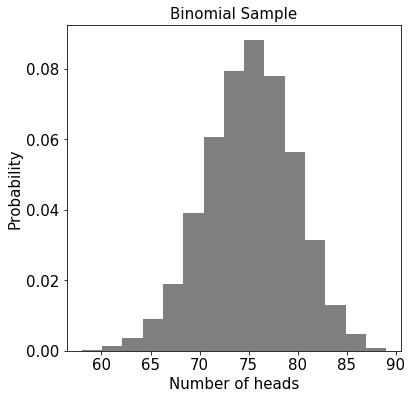

In [32]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(
    np.random.binomial(100, 0.75, size=10000), 
    bins = 15, color = "black", alpha = 0.5, normed = True
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Binomial Sample", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Number of heads", fontsize = 15)

#### 6.3.1.3: Poisson distribution: the number of events occurring in a fixed time window
The Poisson distribution models the number of times an random event will occur over a fixed window, provided a specific success rate, $\lambda$, is known. For example, supposing the average number of patients entering an emergency room between 12–1pm has historically been 50. Assuming emergency events are unrelated, we might then model the possibility of emergency room cohort size using $\lambda = 50$ and the Poisson distribution:

$$P(k\text{ arrivals in the hour}) = \frac {\lambda ^{k}e^{-\lambda }}{k!}$$

which numpy also provides a facility for:

- `np.random.poisson(lambda, size = None)`

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


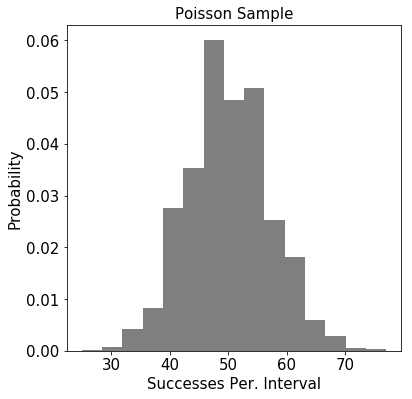

In [33]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(
    np.random.poisson(50,size=10000), 
    bins = 15, color = "black", alpha = 0.5, normed = True
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Poisson Sample", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Successes Per. Interval", fontsize = 15)

#### 6.3.1.4 Poisson and binomial are related!
Poisson specifically asks about events per time, given a rate, while Binomial asks about number of successes, given a fixed number of trials. If the number of binomial trials $n$ is large and the chance of binomial success, $p$, is very low, then these two distributions _converge_.  For example, if you flipped a _very_ biased coin with heads probability $p=0.05$ approximately $n = 1000$ times an hour, we might model your numbers of heads every hour using $\lambda = np = 50$, instead of the binomial distribution.

Here's how close that binomial distribution gets to the Poisson:

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


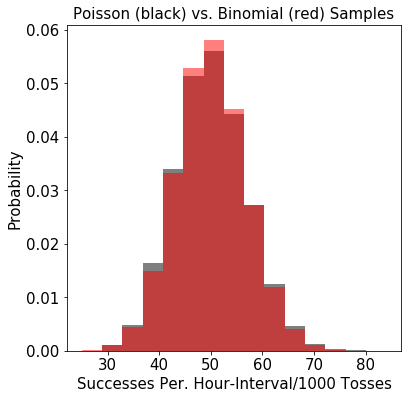

In [34]:
fig = plt.figure(figsize = (6,6))

n, bins, _ = plt.hist(
    np.random.poisson(50,size=10000), 
    bins = 15, color = "black", alpha = 0.5, normed = True
)
_ = plt.hist(
    np.random.binomial(1000, 0.05,size=10000), 
    bins = bins, color = "red", alpha = 0.5, normed = True
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Poisson (black) vs. Binomial (red) Samples", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Successes Per. Hour-Interval/1000 Tosses", fontsize = 15)

### 6.3.2 Continuous random variables
Just like continuous empirical probabilities pertained to quantities that have arbitrarily-close spacing, so will continuous random variables. Instead of counting numbers of successful of coin tosses, we'll be more interested in quantities like human height and weight, or stock price changes.

#### 6.3.2.1 The Normal Distribution
This distribution is particularly well known for a few reasons. First, the variation of many measureable human characteristics, like height and weight, is often normally distributed. Secondly, is because of the _Central Limit Theorem_, which states that many distributions converge to the normal distribution if you sample from them enough times and look at the distribution of sample averages. In particular, this applies to any for which the mean and standard deviation are finite. A classic bell-curve normal distribution with mean $\mu$ and variance, $\sigma^2$ is described by:

$$P(x) = \frac {1}{\sqrt {2\pi \sigma ^ 2}}e^{-{\frac {(x-\mu )^2}{2\sigma ^ 2}}}$$

The normal distribution's function isn't so pretty to look at, but the data it produces are very mild:

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


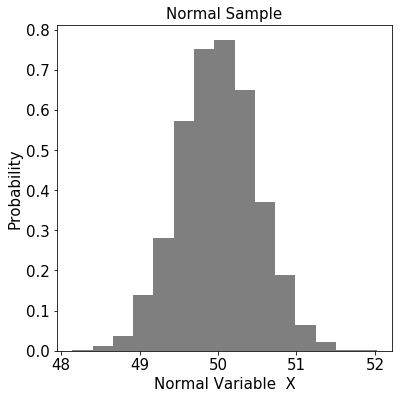

In [35]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(
    np.random.normal(50,0.5, size=10000), 
    bins = 15, color = "black", alpha = 0.5, normed = True
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Normal Sample", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Normal Variable  X", fontsize = 15)

#### 6.3.2.2 Continuous waiting time: the exponential distribution
This distribution is closely related to the Poisson distribution, but focuses on the continuous variable: how long it takes for an event to happen, given the event has a known rate of occurrence, $\lambda$. Alternatively, the time between events, $\beta = 1/\lambda$, might be known. In our coin tossing example we could take $\lambda = 50$ heads/hour to model:

$$P(\text{the event occurs after }\:\:x\:\:\text{ units of time}) = \lambda e^{-\lambda x}$$

And sample waiting times, using:

- `np.random.exponential(lambda, size = None)`

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


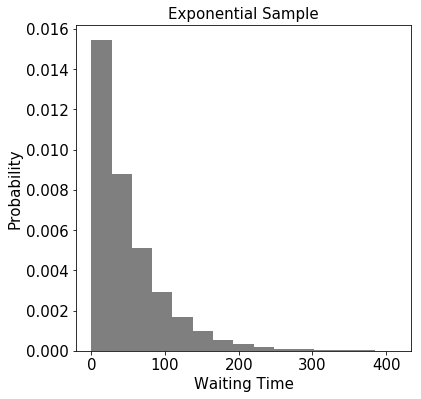

In [36]:
fig = plt.figure(figsize = (6,6))

_ = plt.hist(
    np.random.exponential(50, size=10000), 
    bins = 15, color = "black", alpha = 0.5, normed = True
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Exponential Sample", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Waiting Time", fontsize = 15)

### 6.3.3 Lining data up with reality
We've looked at the baseball player heights and weights quite a bit and hypothesized their similarity to to normally distributed data. Can we compare these to a normal sample, and if so, how do we get a sample that matches closely?

#### 6.3.3.1 Example: are baseball player weights (again) normal?
One way to get a sense of whether or not a distribution &quot;fits&quot; data is to see if a _version_ of the _model_ distribution that has the same statistics. So, since our baseball player weights have the following mean, standard deviation, and sample size:

In [37]:
print(
    np.mean(baseball_data["Weight"]), 
    np.std(baseball_data["Weight"]), 
    len(baseball_data["Weight"])
)

201.6892545982575 20.981327860873357 1033


Could we match with $1,033$ normally-sampled points, using $\mu \approx 201.69$, and $\sigma^2=20.98$ for a model? Let's see!

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


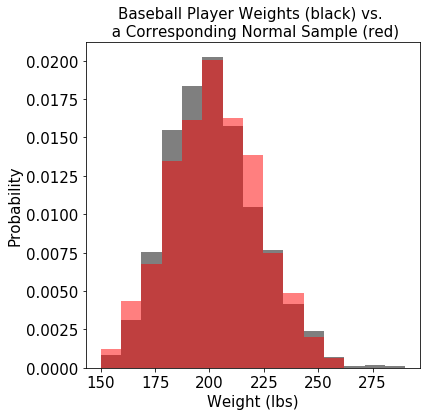

In [38]:
fig = plt.figure(figsize = (6,6))

n, bins, _ = plt.hist(
    baseball_data["Weight"], 
    bins = 15, color = "black", alpha = 0.5, normed = True
)

## plot the normal distribution using the same bins
_ = plt.hist(
    np.random.normal(201.69,20.98, size=1033), 
    bins = bins, color = "red", alpha = 0.5, normed = True
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Baseball Player Weights (black) vs. \n a Corresponding Normal Sample (red)", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Weight (lbs)", fontsize = 15)

#### 6.3.3.2 Example: are stock price changes normal?
Returning to our Apple price change data, recall it was symmetric and centered. Does this mean it is normal?
Well, let's pull the same statistics for these data and make the same comparison plot.

In [39]:
## This loads the csv file from disk
APPL = pd.read_csv(
    filepath_or_buffer="data/APPL.csv", sep=",", 
    header=0, parse_dates = [0]
)

print(
    np.mean(APPL["Close"] - APPL["Open"]),
    np.std(APPL["Close"] - APPL["Open"]),
    len(APPL["Close"])
)

-0.06797174652923894 3.4130312676741443 4754


So, let's see how the price-change data and a normal distribution compare. Do they appear to overlap as much? What's going on?

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


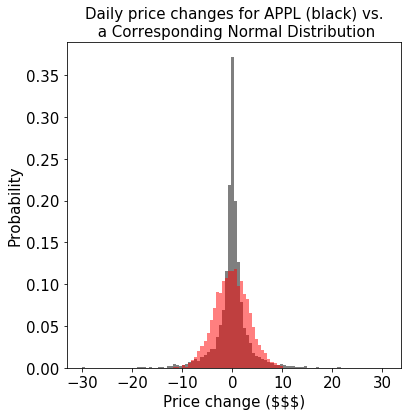

In [40]:
## set the figure dimensions
fig = plt.figure(figsize = (6,6))
    
## make a histogram
n, bins, _  = plt.hist(
    APPL["Close"] - APPL["Open"], 
    color = "black", alpha = 0.5, bins = 100, normed = True
)

## plot the normal distribution histogram,
## using the same bins as the data
_ = plt.hist(
    np.random.normal(-0.06797,3.413, size=4754), 
    bins = bins, color = "red", alpha = 0.5, normed = True
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Daily price changes for APPL (black) vs.\n a Corresponding Normal Distribution", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Price change ($$$)", fontsize = 15)

#### 6.3.3.3 Alternative candidate distributions (for the price change data)
Even Though Some Data exhibit Symmentry & Centrality, They Might Still Not be Normal. Notice how much higher the peak at the middle is than the normal sample. The Apple price changes (and likely other companies) are probably better modeled by what's called a _Cauchy_ distribution:

$$P(x) = \frac{1}{\pi\gamma\,\left[1 + \left(\frac{x-x_0}{\gamma}\right)^2\right]}$$

Even though this distribution is symmetric and has a definite center, it technically has no theoretical mean or variance! Intuitively, this is because the distribution is much more wild: while the normal distribution has vanishingly small probabilities at its tails, a Cauchy distribution will still have some relatively high ocurrence of extreme events. This is well aligned to the stock market data, where most price changes are small (high peak in the middle), but occasionally, _large_ changes are observed (e.g., a stock crashes).

Note: even though $x_0$ and $\gamma$ are _not_ the Cauchy distribution's mean and variance, they _are_ still parameters that control centrality and variation, respectively. We can sample a Cauchy distribution using scipy:

- `stats.cauchy.rvs(loc=x0, scale=gamma, size=n)`

As it turns out, the Cauchy distribution does have _median_ equal to $x_0$. Thus, we could see what a similar Cauchy Distribution looks like if we knew $x_0$, and  an _empirical_ estimate of $P(x_0)$. With these, we could solve:

$$\gamma = \frac{1}{\pi P(x_0)}$$

So, how could we estimate $P(x_0)$? Figure out the height of a normed histogram! We'll have to loop over the bin edges to figure out which bin the median falls into.

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


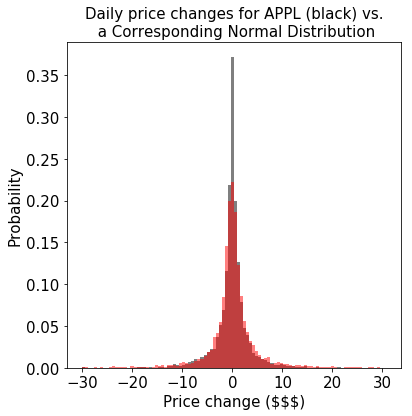

In [41]:
from scipy.stats import cauchy

## set the figure dimensions
fig = plt.figure(figsize = (6,6))
    
## make a histogram
n, bins, _  = plt.hist(
    APPL["Close"] - APPL["Open"], 
    color = "black", alpha = 0.5, bins = 100, normed = True
)

## figure out the cauchy statistics
x0 = np.median(APPL["Close"] - APPL["Open"])
Px0 = 0
for i, UpperBound in enumerate(bins):
    if x0 <= UpperBound:
        if i:
            Px0 = n[i-1]*(bins[1] - bins[0])
        break
        
gamma = 1/(np.pi*Px0)

## plot the Cauchy distribution histogram, 
## using the same bins as from the data histogram
_ = plt.hist(
    list(cauchy.rvs(loc=x0, scale=gamma, size=4754)),
    bins = bins, color = "red", alpha = 0.5, normed = True
)

## Set the tick and label fontsize
plt.tick_params(labelsize=15)

## Set the title
_ = plt.title("Daily price changes for APPL (black) vs.\n a Corresponding Normal Distribution", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Probability", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Price change ($$$)", fontsize = 15)